Dataset link - https://www.kaggle.com/datasets/CooperUnion/cardataset/code

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

/var/folders/4q/1m012dp12171snbzxvvcncdr0000gn/T/ipykernel_42469/1912864649.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
data = pd.read_csv('car_price.csv')
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# Data Prepartion

Data is inconsistent. Fixing col names

In [6]:
data.columns # this returns index

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [12]:
data.columns = data.columns.str.lower().str.replace(' ', '_')
data.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


There is inconsistency in data values as well. Some values are all caps and some are not

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

Getting all the object columns

In [16]:
data.dtypes[data.dtypes == 'object']

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [19]:
strings = list(data.dtypes[data.dtypes == 'object'].index)

strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [25]:
#lowering all the values and replacing space with _
for col in strings:
    data[col] = data[col].str.lower().str.replace(' ','_')

data.head(2)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650


# EDA

In [30]:
# Looking at values in each column
for col in data.columns:
    print(col)
    print(data[col].unique()[:5])#getting 5 unique values for each column
    print(data[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

Distribution of price

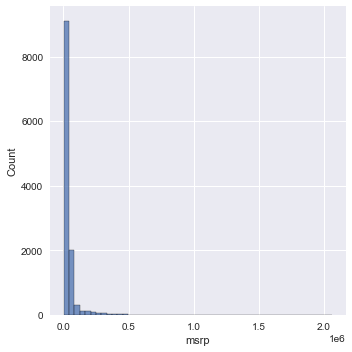

In [45]:
sns.displot(data['msrp'], bins = 50)


Looks like the data is right-skewed. In the dataset there are few cars that are priced above 500k

In [49]:
data[data['msrp'] > 500000]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
698,maybach,62,2010,premium_unleaded_(required),631.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,high-performance",large,sedan,16,10,67,506500
1622,lamborghini,aventador,2014,premium_unleaded_(required),720.0,12.0,automated_manual,all_wheel_drive,2.0,"exotic,high-performance",midsize,convertible,16,10,1158,548800
1626,lamborghini,aventador,2015,premium_unleaded_(required),720.0,12.0,automated_manual,all_wheel_drive,2.0,"exotic,high-performance",midsize,convertible,16,10,1158,548800
1629,lamborghini,aventador,2016,premium_unleaded_(required),750.0,12.0,automated_manual,all_wheel_drive,2.0,"exotic,high-performance",midsize,convertible,18,11,1158,535500
4024,ferrari,enzo,2003,premium_unleaded_(required),660.0,12.0,automated_manual,rear_wheel_drive,2.0,"exotic,high-performance",compact,coupe,12,7,2774,643330
6350,maybach,landaulet,2011,premium_unleaded_(required),620.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,high-performance",large,convertible,16,10,67,1380000
6351,maybach,landaulet,2012,premium_unleaded_(required),620.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,convertible,16,10,67,1382750
8486,lamborghini,reventon,2008,premium_unleaded_(required),650.0,12.0,automated_manual,all_wheel_drive,2.0,"exotic,high-performance",compact,coupe,14,9,1158,1500000
11362,bugatti,veyron_16.4,2008,premium_unleaded_(required),1001.0,16.0,automated_manual,all_wheel_drive,2.0,"exotic,high-performance",compact,coupe,14,8,820,2065902
11363,bugatti,veyron_16.4,2008,premium_unleaded_(required),1001.0,16.0,automated_manual,all_wheel_drive,2.0,"exotic,high-performance",compact,coupe,14,8,820,1500000


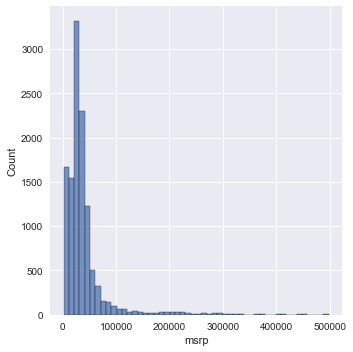

In [52]:
#ditrbution of car prices below 500k
sns.displot(data['msrp'][data['msrp'] < 500000], bins = 50)


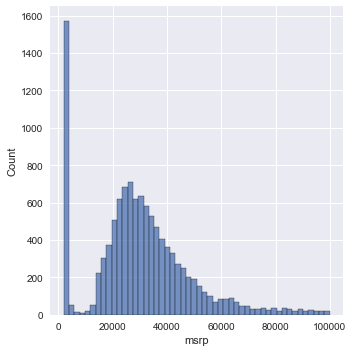

In [53]:
sns.displot(data['msrp'][data['msrp'] < 100000], bins = 50)


The cars are priced averaged at 35000. Alot of cars have price of 1000$ which might be the minimum price you can put on the platform 

In [54]:
price_logs = np.log1p(data['msrp'])
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

Looking at missing data 

In [4]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

3 cols with missing values-
- Engine Fuel type 6 missing
- Engine HP 69 values
- Engine cylinders 30 missing
- Market Category 3742 missing

# Setting up validation framework
60, 20, 20%

In [57]:
n = len(data)

n_val = int(n * 0.2)
n_test = int(n* 0.2)
n_train = n - n_test - n_val

n_val , n_test ,n_train


(2382, 2382, 7150)

In [60]:
df_train = data.iloc[:n_train]
df_val = data.iloc[n_train : n_train + n_val]
df_test = data.iloc[n_val + n_train:]

In [61]:
#genrating a sequence of numbers from 1 to n-1
idx = np.arange(n)

In [63]:
#shuffle
np.random.shuffle(idx)
idx

array([5541, 9103, 1104, ..., 8800, 7145, 9450])

In [66]:
df_train = data.iloc[idx[n_train:]]
df_val = data.iloc[idx[n_train : n_train + n_val]]
df_test = data.iloc[idx[n_val + n_train:]]

In [69]:
df_train = df_train.reset_index()
df_test = df_test.reset_index()
df_val = df_val.reset_index()

In [71]:
#log transforming our target variable
y_train = np.log1p(df_train.msrp.values) #.values to get np array and not pandas series
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [72]:
#reomving msrp from our X
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']